In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root="./datasets/",
                                       train=True, download=False,
                                       transform=transform)

In [3]:
trainloader = torch.utils.data.DataLoader(dataset=trainset,
                                         batch_size=4,
                                         shuffle=False,
                                         num_workers=1)

In [4]:
testset = torchvision.datasets.CIFAR10(root="./datasets/", 
                                       train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

GroundTruth:    cat  ship  ship plane


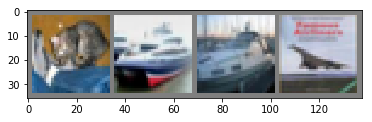

In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [34]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 16, kernel_size=5),
                                   nn.BatchNorm2d(16),
                                   nn.ReLU(),
                                   nn.MaxPool2d(2,2))
        self.layer2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=5),
                                   nn.BatchNorm2d(32),
                                   nn.ReLU(),
                                   nn.MaxPool2d(2,2))
        self.fc = nn.Linear(5*5*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(-1,5*5*32)
        out = self.fc(out)
        return out

In [35]:
cnn = CNN()
print(cnn)

CNN (
  (layer1): Sequential (
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (layer2): Sequential (
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (fc): Linear (800 -> 10)
)


In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.001)

In [37]:
print(images.size())

torch.Size([4, 3, 32, 32])


In [43]:
num_epochs = 2
batch_size = 4
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        images = Variable(images)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1000 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(trainset)//batch_size, loss.data[0]))


Epoch [1/2], Iter [1000/12500] Loss: 1.8080
Epoch [1/2], Iter [2000/12500] Loss: 1.6886
Epoch [1/2], Iter [3000/12500] Loss: 1.6693
Epoch [1/2], Iter [4000/12500] Loss: 2.3387
Epoch [1/2], Iter [5000/12500] Loss: 1.3936
Epoch [1/2], Iter [6000/12500] Loss: 1.4736
Epoch [1/2], Iter [7000/12500] Loss: 1.3612
Epoch [1/2], Iter [8000/12500] Loss: 1.2734
Epoch [1/2], Iter [9000/12500] Loss: 1.6008
Epoch [1/2], Iter [10000/12500] Loss: 2.4837
Epoch [1/2], Iter [11000/12500] Loss: 1.7868
Epoch [1/2], Iter [12000/12500] Loss: 1.2285
Epoch [2/2], Iter [1000/12500] Loss: 1.4375
Epoch [2/2], Iter [2000/12500] Loss: 1.7833
Epoch [2/2], Iter [3000/12500] Loss: 1.4404
Epoch [2/2], Iter [4000/12500] Loss: 2.1136
Epoch [2/2], Iter [5000/12500] Loss: 0.9308
Epoch [2/2], Iter [6000/12500] Loss: 1.3283
Epoch [2/2], Iter [7000/12500] Loss: 0.9363
Epoch [2/2], Iter [8000/12500] Loss: 0.9817
Epoch [2/2], Iter [9000/12500] Loss: 1.6071
Epoch [2/2], Iter [10000/12500] Loss: 2.5817
Epoch [2/2], Iter [11000/125

In [44]:
# Test the Model

cnn.eval()
correct = 0
total = 0

In [45]:
for images, labels in testloader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print("Test Accuracy of the model on the 10000 test images: %d %%"
     % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 57 %


In [46]:
# save the trained model
# torch.save(cnn.state_dict(), "cnn.pkl")